In [5]:
#conda install graphviz --yes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import sklearn
import Bio
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from collections import Counter
from Bio import SeqIO, AlignIO, Phylo
from Bio.Alphabet import IUPAC,generic_alphabet,generic_dna
from Bio.SeqUtils import GC
from sklearn.metrics import pairwise_distances
import random

In [6]:
def uniqueSequences(file):
    name = []
    seq = []
    percentage = []
    with open(file, 'r') as file:
        for line in file:
            values = line.split(' ')
            name.append(values[0])
            seq.append(values[1])
    s = np.array(seq)
    u, counts = np.unique(s, return_counts = True)
    np.save('t3_uniques_', u)

In [7]:
#uniqueSequences1 = uniqueSequences('DATA1/B16-4-R1_MapGeneious.phy')
#uniqueSequences2 = uniqueSequences('DATA1/B16-8-R1_MapGeneious.phy')
uniqueSequences3 = uniqueSequences('DATA1/B16-11-R1_MapGeneious.phy')

In [8]:
t1_uniques_net1 = pd.read_csv('t1_uniques_.csv')
t2_uniques_net2 = pd.read_csv('t2_uniques_.csv')
t3_uniques_net3 = pd.read_csv('t3_uniques_.csv')

In [9]:
t1_uniques_net1.columns.tolist()

['uniqueSequences']

In [10]:
t1_uniques_net1.head(3)

,uniqueSequences
0,CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCAC...
1,GGCTTAGATT-----GTGAACCCTGTTGAGAATGCTGGTATGTCAC...
2,GGCTTAGATT-----GTGAATACTGTTGAGAACGCTGGTTCGTCAC...


In [11]:
ref1='CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCACTTCCATCGCGAGCTGCCTCCCGTGCATCCGAAGATGTTCTCAAGCTCTAAGGG-CAGATTTGTCTTTT-CCTGGTCACTATAA-TGTATTCTTC------T------T------AT-AGTGAGTCGTATTAG'
ref2='CTTTAAGGTTC-A---GTGAATACTGTTGAGAACGCTGGTTCGT-CACTTCC-ATCGCGAG-CTGCCTCC-CGTGCATCCGAAGATGTTCTCAAGCTCTAAGGGCAGATTTGTCTTTT--CCTGGT-CACTATAATGTATTCTTCT------------T---------ATA-GTGAGTC-GTATTAG-'
ref3='CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCACT-TC--CATCGCGAGCTGCCTCCCGTGCATCCGAAGATGTTCTCAAGCTCTAAGGGCAGATTTGTCTTTT-CCTGGTCACTATAATGTATTCTTCT--------T---ATAGTGAGTCGTATTAG'

In [12]:
def hamming_distance(string1, string2): 
    distance = 0
    length = len(string1)
    for i in range(length):
        if string1[i] != string2[i]:
            distance += 1
    return distance

In [13]:
t1_net1 = (t1_uniques_net1.uniqueSequences.apply(hamming_distance, args=(ref1,)))
t2_net2 = (t2_uniques_net2.uniqueSequences.apply(hamming_distance, args=(ref2,)))
t3_net3 = (t3_uniques_net3.uniqueSequences.apply(hamming_distance, args=(ref3,)))

In [14]:
print(type(t1_net1))

<class 'pandas.core.series.Series'>


In [15]:
print(list(t1_net1))

[0, 22, 9, 18, 24, 14, 15, 21, 14, 15, 18, 16, 17, 17, 17, 16, 14, 33, 11, 17, 13, 15, 18, 18, 16, 14, 17, 17, 16, 17, 13, 17, 15, 13, 13, 16, 28, 14, 15, 23, 16, 14, 37, 14, 18, 16, 16, 19, 14, 19, 20, 14, 14, 14, 14, 15, 27, 18, 14, 14, 19, 16, 14, 14, 16, 16, 17, 16, 14, 15, 16, 13, 14, 14, 14, 14, 16, 15, 14, 14, 17, 14, 18, 14, 14, 15, 15, 15, 14, 15, 17, 16, 16, 15, 16, 17, 14, 17, 16, 15, 14, 16, 15, 14, 15, 14, 14, 14, 14, 15, 14, 16, 16, 14, 14, 14, 14, 14, 14, 14, 17, 14, 14, 16, 19, 19, 14, 18, 14, 16, 14, 27, 17, 25, 16, 14, 14, 15, 14, 14, 14, 15, 14, 16, 16, 15, 14, 14, 20, 14, 17, 14, 14, 14, 14, 14, 26, 15, 26, 14, 30, 14, 15, 17, 25, 17, 25, 15, 15, 18, 17, 16, 16, 15, 14, 20, 17, 19, 14, 16, 18, 30, 23, 39, 42, 15, 19, 19, 26, 21, 22, 32, 18, 14, 15, 37, 14, 19, 26, 17, 15, 19, 16, 15, 15, 16, 15, 14, 20, 21, 15, 32, 19, 16, 16, 14, 15, 23, 14, 44, 14, 16, 13, 20, 42, 31, 33, 39, 15, 41, 40, 28, 26, 39, 34, 40, 40, 29, 39, 29, 37, 40, 30, 30, 36, 42, 39, 29, 40, 36, 3

In [16]:
t1_net1.to_csv('t1_net1.csv', index = True)
t2_net2.to_csv('t2_net2.csv', index = True)
t3_net3.to_csv('t3_net3.csv', index = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
t1_net1 = pd.read_csv('t1_net1.csv')
t2_net2 = pd.read_csv('t2_net2.csv')
t3_net3 = pd.read_csv('t3_net3.csv')

In [18]:
print(type(t1_net1))

<class 'pandas.core.frame.DataFrame'>


/opt/anaconda3/lib/python3.7/site-packages/pygraphviz/agraph.py:1341: RuntimeWarning: Warning: Overlap value "prism" unsupported - ignored

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


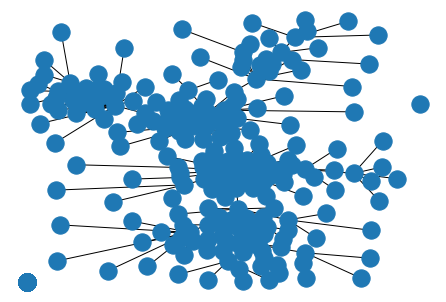

In [21]:
t1_net1 = nx.read_edgelist("t1_net1.txt")
nx.draw_spectral(t1_net1)
nx.draw(t1_net1,pos=nx.nx_agraph.graphviz_layout(t1_net1,prog='fdp'))
nx.write_graphml(t1_net1, 't1_net1.graphml')

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/pygraphviz/agraph.py:1341: RuntimeWarning: Warning: Overlap value "prism" unsupported - ignored

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


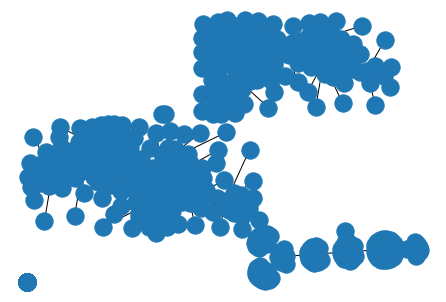

In [22]:
t2_net2 = nx.read_edgelist("t2_net2.txt")
nx.draw_spectral(t2_net2)
nx.draw(t2_net2,pos=nx.nx_agraph.graphviz_layout(t2_net2,prog='fdp'))
nx.write_graphml(t2_net2, 't2_net2.graphml')

/opt/anaconda3/lib/python3.7/site-packages/pygraphviz/agraph.py:1341: RuntimeWarning: Warning: Overlap value "prism" unsupported - ignored

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


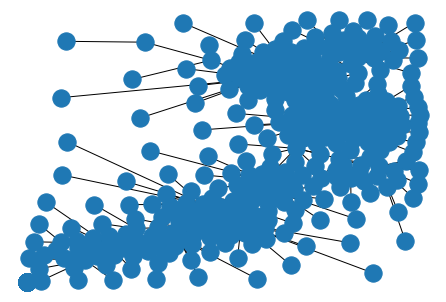

In [23]:
t3_net3 = nx.read_edgelist("t3_net3.txt")
nx.draw_spectral(t3_net3)
nx.draw(t3_net3,pos=nx.nx_agraph.graphviz_layout(t3_net3,prog='fdp'))
nx.write_graphml(t3_net3, 't3_net3.graphml')

These files can be imported into Cytoscape for further editing and calculations